<a href="https://colab.research.google.com/github/haebarassi/DeepLearing/blob/main/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. ABOUT TENSOR

- PyTorch에서는 텐서를 사용하여 모델의 input, output, 모델의 매개변수들을 encode(부호화)한다.
- tensor는 numpy의 ndarray와 유사하다.
- tensor는 자동 미분(automatic differentiation)에 최적화되어있다.

In [106]:
import torch
import numpy as np

## tensor 초기화 하기

### 1. 데이터로부터 directly 직접 생성하기

- 데이터의 data type은 자동으로 유추함

In [107]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

In [108]:
x_data

tensor([[1, 2],
        [3, 4]])

### 2. numpy 배열로부터 생성하기

In [109]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

### 3. 다른 텐서로부터 생성하기

- 인자로 주어진 텐서의 속성(shape, datatype) 유지

In [110]:
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones}\n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]])



In [111]:
x_zeros = torch.zeros_like(x_data)
print(f"Zeros Tensor: \n {x_zeros}\n")

Zeros Tensor: 
 tensor([[0, 0],
        [0, 0]])



In [112]:
x_rand = torch.rand_like(x_data, dtype=torch.float) # x_data의 속성을 덮어씁니다.
print(f"Random Tensor: \n{x_rand}\n")

Random Tensor: 
tensor([[0.2611, 0.4221],
        [0.1022, 0.1578]])



### 4. 무작위 random 또는 상수 constant 값을 사용하기

- shape: 텐서의 차원(dimension)을 나타내는 tuple
- 아래 예시들에서 shape가 출력 텐서의 차원을 결정한다.

In [113]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.0773, 0.7698, 0.5426],
        [0.4634, 0.3430, 0.5962]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## tensor의 attrubute(속성)

: 텐서의 shape, datatype, 어느 장치에 저장되는가

In [114]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Tensor Operation(연산)

In [115]:
# GPU가 존재하면 텐서를 이동합니다
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

#### 연산하기 전 먼저 tensor 생성하기

In [116]:
arr = np.arange(1,17)
arr = arr.astype(np.float32)
arr

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16.], dtype=float32)

In [117]:
arr.shape=(4,4)

In [118]:
tensor = torch.from_numpy(arr)

In [119]:
# tensor = tensor.float() # casting(형변환)

In [120]:
tensor.dtype

torch.float32

### indexing, slicing

In [121]:
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 2., 3., 4.])
First column: tensor([ 1.,  5.,  9., 13.])
Last column: tensor([ 4.,  8., 12., 16.])
tensor([[ 1.,  0.,  3.,  4.],
        [ 5.,  0.,  7.,  8.],
        [ 9.,  0., 11., 12.],
        [13.,  0., 15., 16.]])


### tensor 합치기

torch.cat

In [122]:
t1 = torch.cat([tensor,tensor,tensor],dim=1)
print(t1)
print(t1.shape) # (4,4) -> (4,12)

tensor([[ 1.,  0.,  3.,  4.,  1.,  0.,  3.,  4.,  1.,  0.,  3.,  4.],
        [ 5.,  0.,  7.,  8.,  5.,  0.,  7.,  8.,  5.,  0.,  7.,  8.],
        [ 9.,  0., 11., 12.,  9.,  0., 11., 12.,  9.,  0., 11., 12.],
        [13.,  0., 15., 16., 13.,  0., 15., 16., 13.,  0., 15., 16.]])
torch.Size([4, 12])


torch.stack

In [123]:
t2 = torch.stack([tensor,tensor,tensor],dim=1)
print(t2)
print(t2.shape) # (4,4) -> (4,3,4)

tensor([[[ 1.,  0.,  3.,  4.],
         [ 1.,  0.,  3.,  4.],
         [ 1.,  0.,  3.,  4.]],

        [[ 5.,  0.,  7.,  8.],
         [ 5.,  0.,  7.,  8.],
         [ 5.,  0.,  7.,  8.]],

        [[ 9.,  0., 11., 12.],
         [ 9.,  0., 11., 12.],
         [ 9.,  0., 11., 12.]],

        [[13.,  0., 15., 16.],
         [13.,  0., 15., 16.],
         [13.,  0., 15., 16.]]])
torch.Size([4, 3, 4])


### 산술연산 (Arithmetric operations)

행렬곱 matrix multiplication

In [124]:
tensor

tensor([[ 1.,  0.,  3.,  4.],
        [ 5.,  0.,  7.,  8.],
        [ 9.,  0., 11., 12.],
        [13.,  0., 15., 16.]])

In [125]:
tensor.T

tensor([[ 1.,  5.,  9., 13.],
        [ 0.,  0.,  0.,  0.],
        [ 3.,  7., 11., 15.],
        [ 4.,  8., 12., 16.]])

In [126]:
y1 = tensor@tensor.T
print(y1)

y2 = tensor.matmul(tensor.T)
print(y2)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)
print(y3)

tensor([[ 26.,  58.,  90., 122.],
        [ 58., 138., 218., 298.],
        [ 90., 218., 346., 474.],
        [122., 298., 474., 650.]])
tensor([[ 26.,  58.,  90., 122.],
        [ 58., 138., 218., 298.],
        [ 90., 218., 346., 474.],
        [122., 298., 474., 650.]])
tensor([[ 26.,  58.,  90., 122.],
        [ 58., 138., 218., 298.],
        [ 90., 218., 346., 474.],
        [122., 298., 474., 650.]])


In [127]:
agg = tensor.sum()
agg_item =agg.item()
print(agg_item, type(agg_item))

104.0 <class 'float'>


tensor와 numpy는 memory 공간을 공유한다. 따라서 하나를 변경하면 다른 하나도 변경된다.

In [128]:
# tensor는 arr라는 numpy 배열을 텐서로 변환해서 만든 tensor 였으므로 
# 해당 arr를 다시 조회하면,
# 지금까지 tensor를 변경한 내용이 그대로 반영되었음을 알 수 있다.

print(f"arr:\n{arr}")
print(f"tensor:\n{tensor}")

arr:
[[ 1.  0.  3.  4.]
 [ 5.  0.  7.  8.]
 [ 9.  0. 11. 12.]
 [13.  0. 15. 16.]]
tensor:
tensor([[ 1.,  0.,  3.,  4.],
        [ 5.,  0.,  7.,  8.],
        [ 9.,  0., 11., 12.],
        [13.,  0., 15., 16.]])


In [129]:
# 반대로 tensor를 numpy 배열로 변환한 경우도 똑같음 !!
t = torch.ones(5)
n = t.numpy()

In [130]:
t.add_(1)
print(f"t:\n{t}")
print(f"n:\n{n}")

t:
tensor([2., 2., 2., 2., 2.])
n:
[2. 2. 2. 2. 2.]


# 2. DATASET & DATALOADER

- dataset 코드는 readability, modularity를 위해 학습 코드로부터 분리하는 것이 좋다
- PyTorch에는 ```torch.utils.data.DataLoader```와 ```torch.utils.data.Dataset```을 통해 pre-loaded dataset이나 가지고 있는 dataset을 사용할 수 있게 한다.
- ```Dataset```: sample과 정답 label제공
- ```DataLoader```: ```Dataset```을 샘플에 쉽게 접근할 수 있게 iterable한 객체로 감싼다.

## dataset 불러오기

- PyTorch의 torchvision에서 Fashion-MNIST 데이터셋 불러와서 사용해보자 
  - 60,000개 학습예제
  - 10,000개 테스트예제
  - grey scale(흑백) 28*28 이미지
  - 10개 class 중 하나인 정답 label

Parameter
- root 는 학습/테스트 데이터가 저장되는 경로입니다.
- train 은 학습용 또는 테스트용 데이터셋 여부를 지정합니다.
- download=True 는 root 에 데이터가 없는 경우 인터넷에서 다운로드합니다.
- transform 과 target_transform 은 특징(feature)과 정답(label) 변형(transform)을 지정합니다.

In [131]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [133]:
training_data = datasets.FashionMNIST(
    root='data',
    train = True,
    download = True,
    transform = ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [134]:
test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

## 데이터셋 순회, 시각화

- ```Dataset```에 list 처럼 index로 접근할 수 있다.

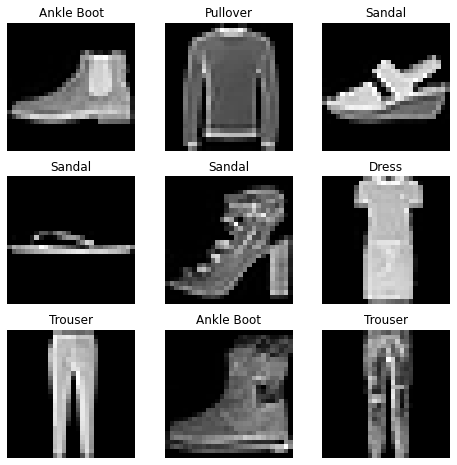

In [136]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 파일에서 사용자 정의 데이터셋 만들기

- 사용자 정의 dataset class 는 세 개 함수 구현 필수 !!
  1. __init__
  2. __len__
  3. __getitem__

In [138]:
import os
import pandas as pd
from torchvision.io import read_image

In [ ]:
class CustomImageDataset(Dataset):

  # __init__: Dataset의 instance가 생성될 때 한 번만 실행됨
  # 이 예시에서는 이미지와 annotation_file 포함된 디렉토리와 두가지 transform 초기화
  def __init__(self, annotations_file, img_dir, transform = None, target_transform= None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

  # __len__: 데이터셋의 샘플 개수 반환
  def __len__(self):
      return len(self.img_labels)

  # __getitem__: 주어진 idx에 해당하는 샘플 데이터셋에서 불러오고 반환
  #  인덱스를 기반으로, 디스크에서 이미지의 위치를 식별하고, 
  #  read_image 를 사용하여 이미지를 텐서로 변환하고,
  #  self.img_labels 의 csv 데이터로부터 해당하는 정답(label)을 가져오고,
  # (해당하는 경우) 변형(transform) 함수들을 호출한 뒤,
  # 텐서 이미지와 라벨을 Python 사전(dict)형으로 반환합니다.
  def __getitem__(self, idx):
      img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
      image = read_image(img_path)
      label = self.img_labels.iloc[idx, 1]
      if self.transform:
          image = self.transform(image)
      if self.target_transform:
          label = self.target_transform(label)
      return image, label

## DataLoader로 학습용 데이터 준비하기

- ```Dataset```: 데이터셋의 feature 가져오고 하나의 샘플에 정답 label 지정하는 일을 한 번에 한다.
  - (모델을 학습할 때, 일반적으로 샘플들을“미니배치(minibatch)”로 전달하고, 매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고, Python의 multiprocessing 을 사용하여 데이터 검색 속도를 높이려고 합니다.)
- ```DataLoader```: 간단한 API로 이러한 복잡한 과정들을 추상화한 순회 가능한 객체(iterable)


In [140]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## DataLoader 통해 iterate 하기

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


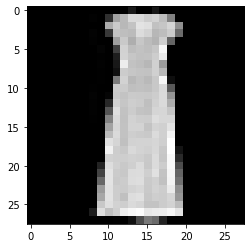

Label: 3


In [145]:
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Data Transform
- data를 학습에 필요한 형태로 조작하여 학습에 적합하게 만들기

모든 TorchVision dataset들은 변형 로직을 갖는 callable한 객체를 받는 매개변수 두 개를 갖는다
- 1) feature를 변경하기 위한 transform 
- 2) 정답을 변경하기 위한 target_transform 

torchvision.transform 모듈은 주로 사용하는 몇 가지 transform을 제공한다.

In [ ]:
# Fashion MNIST의 feature은 PIL Image 형식/ label이 integer
# 학습을 하려면
# 1) normalize(정규화)된 텐서 형태의 feature과
# 2) one-hot encoding 된 텐서형태의 label 필요
# 이러한 transformation을 위해 ToTensor, Lambda 사용한다.

import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)


### 1) ToTensor
-  PIL Image나 NumPy ndarray 를 FloatTensor 로 변환하고, 이미지의 픽셀의 크기(intensity) 값을 [0., 1.] 범위로 비례하여 조정(scale)

### 2) Lambda Transform
- 사용자 정의 람다(lambda) 함수를 적용
- 정수를 one-hot encoding된 tensor로 바꾸는 함수 정의
- (데이터셋 정답의 개수인) 크기 10짜리 영 텐서(zero tensor)를 만들고, scatter_ 를 호출하여 주어진 정답 y 에 해당하는 인덱스에 value=1 을 할당

#### +) labda

lamda 매개변수 : 표현식

In [147]:
def sum(x,y):
  return x+y

sum(10,20)

30

In [148]:
(lambda x,y: x+y)(10,20)
# 매개변수를 표현식대로 표현해준다.

30